# **Graphical Representation and Visualization**


## **Overview of our research process**

We initiated the project by downloading the ERA5 dataset, selecting relevant parameters, and submitting a download request. After approval, the data was received in GRIB format, which requires specialized processing tools. To streamline the workflow, we uploaded the data to a cloud drive for seamless access in Google Colab and implemented necessary libraries for efficient extraction and analysis.

### **Calculation of Earth Division and Area**
**Grid Structure and Latitude-Based Division**
To facilitate energy absorption calculations, we divided the Earth’s surface into grid squares based on 5-degree latitude intervals. Due to the spherical shape of the Earth:


*   Latitude bars shorten near the poles.

*   The width of each grid square varies with latitude as the distance between longitudes changes.

To simplify the calculations, we calculated the area for a single representative square at each latitude level, ensuring a practical and scalable approach.

**Energy Absorption Calculation**
After defining the grid and assigning data points, we calculated energy absorption using two different methods:


*   Absorption using heat capacity and air capacitance
*   Absorption using solar radiation

Custom-developed equations allowed for comparative analysis to assess the consistency of energy absorption estimates across different locations and times.



After this process, we obtain an output of the energy calculation and proceed to the next stage of visualization.

### **Graphical Representation and Visualization Process**

The processed data is presented using a graphical representation showing the trends of energy absorption over a full year.

**The visualization include:**

* **Graphic representation:**  
   * X-axis: represents time in days.
   * Y-axis: represents the average energy accumulated per day.

*   **Multiple Locations:**
   * The code generates four graphs for four predetermined geographic points.
   * Each graph represents how energy absorption changes daily over an entire year.

   

### **Purpose of Visualization**
The main purpose of this visualization is to analyze how energy absorption changes across different locations and times. By providing a clear visual representation of the data, this method enhances our understanding of energy transfer dynamics affected by geographical and atmospheric conditions.

### **Note: The code processes a full year of data for four points on the Earth's surface.


















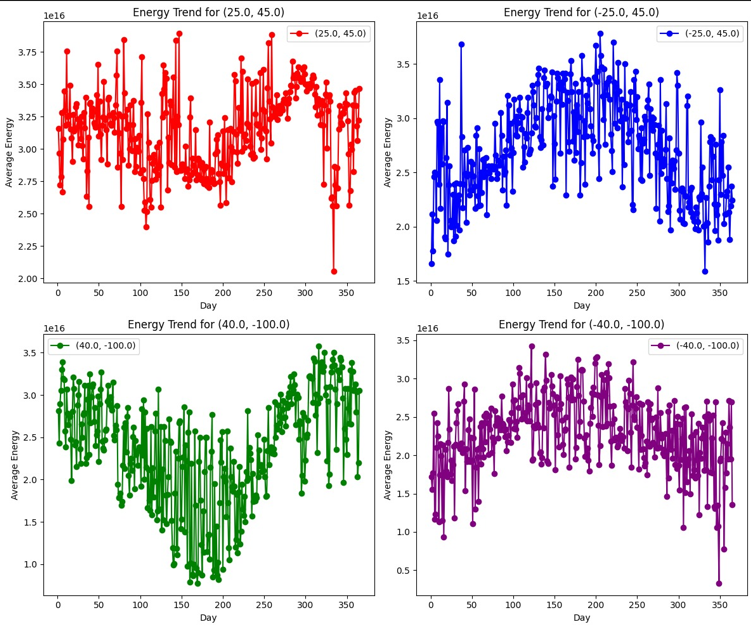





### ***Example of code output:***
represent the average energy absorption in different places on Earth over a year, calculated using the energy absorption equation based on radiation. This approach takes into account solar radiation, cloud cover, albedo, and atmospheric conditions to determine how much energy is absorbed at each point.

In [ ]:
!pip install --upgrade geopandas
!pip install basemap # Install basemap using pip

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
import random

# Mount Google Drive
drive.mount('/content/drive')

# Define folder path and list files to verify filename
folder_path = "/content/drive/My Drive/data_project/"
print("Listing files in directory:")
print(os.listdir(folder_path))

# Automatically find the correct filename (handles case sensitivity)
file_name = None
for f in os.listdir(folder_path):
    if "display_sun_2020" in f.lower():  # Match file name regardless of case
        file_name = f
        break

# Check if file was found
if file_name:
    file_path = folder_path + file_name
    print(f" File found: {file_name}. Proceeding...")

    # Load the CSV file
    df = pd.read_csv(file_path)

    #  Identify unique latitude-longitude locations (select first 4)
    unique_locations = df[['Latitude', 'Longitude']].drop_duplicates().head(4)

    # Define custom colors for each graph
    colors = ['red', 'blue', 'green', 'purple']  # Fixed colors for consistency

    # Create a figure with four subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Loop through the four locations and plot data
    for i, (lat, lon) in enumerate(unique_locations.values):
        ax = axes[i//2, i%2]  # Assign subplot position

        # Filter data for the specific location
        location_data = df[(df['Latitude'] == lat) & (df['Longitude'] == lon)]
        location_data = location_data.sort_values(by='Day')  # Sort data by day

        # Plot energy trend with different colors
        ax.plot(location_data['Day'], location_data['EnergyAVG_Value'], marker='o', linestyle='-',
                label=f"({lat}, {lon})", color=colors[i])

        # Set title and labels
        ax.set_title(f'Energy Trend for ({lat}, {lon})', fontsize=12)
        ax.set_xlabel('Day', fontsize=10)
        ax.set_ylabel('Average Energy', fontsize=10)
        ax.legend()

    plt.tight_layout()
    plt.show()

else:
    print(" File not found. Please check the exact filename in Google Drive.")
